# Proyecto 1 - Etapa 1 - Turismo de los Alpes


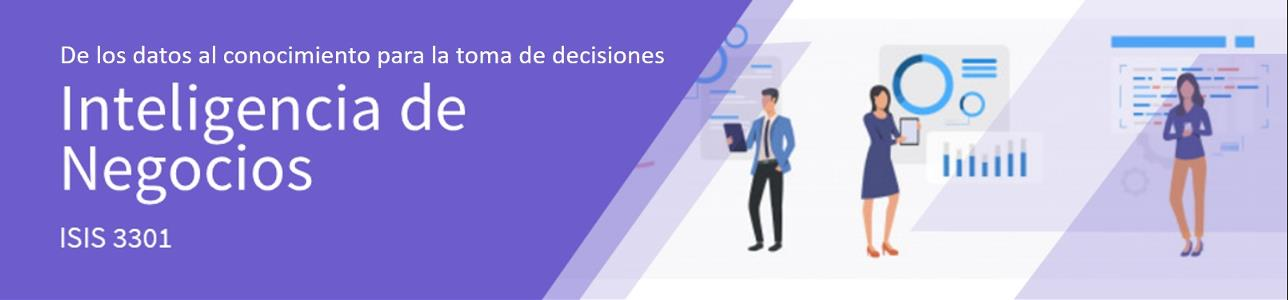

Elaborado por: Carlos Manuel Muñoz Almeida 202120331

## Caso

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.

## Entendimiento del negocio y enfoque analítico

Teniendo en cuenta que uno de los principales objetivos de **Turismo de los Alpes** es lograr analizar características de sitios turísticos y poder determinar la calificación que tendrá un sitio por parte de turistas, se determino lo siguiente:

* Tipo de aprendizaje: Supervisado
* Tarea de aprendizaje: Clasificación
* Algoritmo de machine learning: SVC

Se desea realizar una tarea de clasificación y procesamiento de texto para poder determinar la calificación de un reseña. Para Turismo de los Alpes esto sera de gran valor puesto que podra determinar la calificación de una reseña facilmente, y podra buscar estrategias para mejorar la satisfacción de los turistas y la popularidad de los sitios.

## Carga de librerias


Se importa la libreria wordcloud, sera util para ver la frecuencia de la cantidad de palabras por cada clase de review.

In [1]:
!pip install wordcloud
import wordcloud

Se importa spaCy, una biblioteca de procesamiento de lenguaje natural que sera de gran ayuda.

In [2]:
!pip install spacy
import spacy

  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.0.0 requires pydantic>=1.9.1, but you have pydantic 1.8.2 which is incompatible.
ydata-profiling 4.7.0 requires pydantic>=2, but you have pydantic 1.8.2 which is incompatible.


In [3]:
!pip install es_core_news_sm

Se importan demas librerias que seran de ayuda la hora de procesar y modelar.

In [4]:
import pandas as pd
from scipy import stats as st
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unicodedata

  Using cached pydantic-2.6.4-py3-none-any.whl (394 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.2
    Uninstalling pydantic-1.8.2:
      Successfully uninstalled pydantic-1.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.1.7 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.6.4 which is incompatible.
thinc 8.0.17 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.6.4 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Perfilamiento y entendimiento de los datos

### Carga de datos

Se realiza la carga de los datos de tipo 2.

In [5]:
# Uso de la libreria pandas para la lectura de archivos
import pandas as pd
data=pd.read_csv('tipo2_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')
#Copia de los datos
data_t=data.copy()

Se observa la cantidad de datos y variables.

In [6]:
data_t.shape

(7875, 2)

### Entendimiento de los datos

Se evidencian dos columnas importantes. Review, la reseña del hotel o lugar de turismo. Y Class, la calificación que representa a esa reseña. Donde 1 es la califiación más negativa y 5 es la más positiva.

In [7]:
data_t

Review  Class
0     Muy buena atención y aclaración de dudas por p...      5
1     Buen hotel si están obligados a estar cerca de...      3
2     Es un lugar muy lindo para fotografías, visite...      5
3     Abusados con la factura de alimentos siempre s...      3
4     Tuvimos un par de personas en el grupo que rea...      3
...                                                 ...    ...
7870  Me parece buen sistema, agiliza el transporte,...      4
7871  Fue una escapada de un día desde el complejo, ...      4
7872  La Plaza de la Revolución es un lugar emblemát...      3
7873  Es la segunda ocasión que me quedo en los cuar...      1
7874  Llegamos por casualidad a Los Mercaderes, un g...      5

[7875 rows x 2 columns]

Se evidencia información sobre la completitud y validez de Review y Class. Observamos también el tipo de dato correspondiente a cada caracteristica. No se encuentran datos nulos.

In [8]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


Se realizan estadisticas descriptivas para el analisis de Review. Observamos que hay reseñas mucho más largas que otras. Tambien que curiosamente hay palabras muy largas y cortas, que seguramente son caracteres. En lo que respecta a la moda, observamos que la reseña "El lugar es una maravilla..." se repite, lo cual puede traer problemas a la hora de clasificar.

In [9]:
textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['moda'] = textos['Review'].mode()[0]



In [10]:
textos

Review  Class  Conteo  Max  \
0     Muy buena atención y aclaración de dudas por p...      5     252   20   
1     Buen hotel si están obligados a estar cerca de...      3     297   13   
2     Es un lugar muy lindo para fotografías, visite...      5     104   12   
3     Abusados con la factura de alimentos siempre s...      3     422   14   
4     Tuvimos un par de personas en el grupo que rea...      3     419   14   
...                                                 ...    ...     ...  ...   
7870  Me parece buen sistema, agiliza el transporte,...      4     113   11   
7871  Fue una escapada de un día desde el complejo, ...      4     261   12   
7872  La Plaza de la Revolución es un lugar emblemát...      3     777   14   
7873  Es la segunda ocasión que me quedo en los cuar...      1     651   12   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5     252   11   

      Min                                               moda  
0       0  El lugar es una maravilla que merece ser visit...  
1       1  El lugar es una maravilla que merece ser visit...  
2       1  El lugar es una maravilla que merece ser visit...  
3       1  El lugar es una maravilla que merece ser visit...  
4       1  El lugar es una maravilla que merece ser visit...  
...   ...                                                ...  
7870    2  El lugar es una maravilla que merece ser visit...  
7871    2  El lugar es una maravilla que merece ser visit...  
7872    1  El lugar es una maravilla que merece ser visit...  
7873    0  El lugar es una maravilla que merece ser visit...  
7874    1  El lugar es una maravilla que merece ser visit...  

[7875 rows x 6 columns]

Evidenciamos la cantidad de datos que tenemos por cada calificación. Hay un desbalanceo entre las clases, "5" posee muchos más datos que "1". Esto podría causar sesgos, por lo cual es un problema que tendra que ser tratado.

In [11]:
data_t['Class'].value_counts()


Class
5    2361
4    1977
3    1574
2    1185
1     778
Name: count, dtype: int64

## Preparación de los datos

### Limpieza de los datos

En primer lugar se realizara un limpieza de texto. Esto incluye eliminar caracteres no ascii, especiales, llevar todo a minusculas y remover stop words en español, dado que en general la mayoría de los textos se encuentran en ese idioma. Esto servira para eliminar ruido y asi poder realizar una mejor tarea de clasificación.

In [12]:

def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_special_chars(text):
    text = unicodedata.normalize('NFKD', text)
    return ''.join(char for char in text if char.isalpha() or char.isspace())

def limpieza_general(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'http\S+', '', text)  # Eliminar enlaces
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)  # Eliminar caracteres especiales
    text = re.sub(r'\s+', ' ', text)  # Eliminar espacios en blanco adicionales
    return text.strip()  # Eliminar espacios en blanco al principio y al final


def remove_stopwords(text):
    spanish_stopwords = stopwords.words('spanish')
    words = [word for word in text.split() if word not in spanish_stopwords]
    return " ".join(words)


data_t['words'] = data_t['Review'].apply(remove_non_ascii)
data_t['words'] = data_t['words'].apply(remove_special_chars)
data_t['words'] = data_t['words'].apply(limpieza_general)
data_t['words'] = data_t['words'].apply(remove_stopwords)


In [13]:
data_t

Review  Class  \
0     Muy buena atención y aclaración de dudas por p...      5   
1     Buen hotel si están obligados a estar cerca de...      3   
2     Es un lugar muy lindo para fotografías, visite...      5   
3     Abusados con la factura de alimentos siempre s...      3   
4     Tuvimos un par de personas en el grupo que rea...      3   
...                                                 ...    ...   
7870  Me parece buen sistema, agiliza el transporte,...      4   
7871  Fue una escapada de un día desde el complejo, ...      4   
7872  La Plaza de la Revolución es un lugar emblemát...      3   
7873  Es la segunda ocasión que me quedo en los cuar...      1   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

                                                  words  
0     buena atencion aclaracion dudas parte senorita...  
1     buen hotel si estan obligados cerca centro con...  
2     lugar lindo fotografias visiten selina musica ...  
3     abusados factura alimentos siempre echan culpa...  
4     par personas grupo realmente queriamos comer c...  
...                                                 ...  
7870  parece buen sistema agiliza transporte conecta...  
7871  escapada dia complejo grupo turistas habian gu...  
7872  plaza revolucion lugar emblematico identifica ...  
7873  segunda ocasion quedo cuartos area jardin como...  
7874  llegamos casualidad mercaderes grupo grande va...  

[7875 rows x 3 columns]

### Tokenización

Se aplica un procedimiento de tokenización el cual permitira transformar las oraciones y frases en una lista de palabras para su posterior normalización.

In [14]:

nlp = spacy.load("es_core_news_sm")

data_t['words'] = data_t['words'].apply(lambda x: [token.text for token in nlp(x)])

data_t.head()


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


Review  Class  \
0  Muy buena atención y aclaración de dudas por p...      5   
1  Buen hotel si están obligados a estar cerca de...      3   
2  Es un lugar muy lindo para fotografías, visite...      5   
3  Abusados con la factura de alimentos siempre s...      3   
4  Tuvimos un par de personas en el grupo que rea...      3   

                                               words  
0  [buena, atencion, aclaracion, dudas, parte, se...  
1  [buen, hotel, si, estan, obligados, cerca, cen...  
2  [lugar, lindo, fotografias, visiten, selina, m...  
3  [abusados, factura, alimentos, siempre, echan,...  
4  [par, personas, grupo, realmente, queriamos, c...

In [15]:
data_t.shape

(7875, 3)

### Normalización

En este apartador se aplicara un procesa de elimnación de valores vacios, lematización y estematización para la lista de palabras tokenizadas en el paso anterior.

In [16]:
import spacy
from spacy.lang.es import Spanish
from nltk.stem import SnowballStemmer

nlp = Spanish()
stemmer = SnowballStemmer('spanish')

def lemmatize_verbs(words):
    """Lematiza los verbos en una lista de palabras tokenizadas"""
    lemmas = []
    for word in words:
        doc = nlp(word)
        if doc[0].pos_ == "VERB":
            lemma = doc[0].lemma_
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    return lemmas

def stemmizar(palabras):
    palabras_stemizadas = []
    for palabra in palabras:
            raiz = stemmer.stem(palabra)
            palabras_stemizadas.append(raiz)
    return palabras_stemizadas

def delete_undefined(words):
    new_words = []
    for word in words:
      if word:
        new_words.append(word)
    return new_words

def stem_and_lemmatize(words):
    words = delete_undefined(words)
    words = lemmatize_verbs(words)
    words = stemmizar(words)
    return words



In [17]:

data_t['words'] = data_t['words'].apply(stem_and_lemmatize)

In [18]:
data_t

Review  Class  \
0     Muy buena atención y aclaración de dudas por p...      5   
1     Buen hotel si están obligados a estar cerca de...      3   
2     Es un lugar muy lindo para fotografías, visite...      5   
3     Abusados con la factura de alimentos siempre s...      3   
4     Tuvimos un par de personas en el grupo que rea...      3   
...                                                 ...    ...   
7870  Me parece buen sistema, agiliza el transporte,...      4   
7871  Fue una escapada de un día desde el complejo, ...      4   
7872  La Plaza de la Revolución es un lugar emblemát...      3   
7873  Es la segunda ocasión que me quedo en los cuar...      1   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

                                                  words  
0     [buen, atencion, aclar, dud, part, senorit, ve...  
1     [buen, hotel, si, estan, oblig, cerc, centr, c...  
2     [lug, lind, fotografi, visit, selin, music, vi...  
3     [abus, factur, aliment, siempr, echan, culp, v...  
4     [par, person, grup, realment, queri, com, cabr...  
...                                                 ...  
7870  [parec, buen, sistem, agiliz, transport, conec...  
7871  [escap, dia, complej, grup, turist, habi, gui,...  
7872  [plaz, revolucion, lug, emblemat, identif, hab...  
7873  [segund, ocasion, qued, cuart, are, jardin, co...  
7874  [lleg, casual, mercader, grup, grand, vari, fa...  

[7875 rows x 3 columns]

In [19]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

Review  Class  \
0     Muy buena atención y aclaración de dudas por p...      5   
1     Buen hotel si están obligados a estar cerca de...      3   
2     Es un lugar muy lindo para fotografías, visite...      5   
3     Abusados con la factura de alimentos siempre s...      3   
4     Tuvimos un par de personas en el grupo que rea...      3   
...                                                 ...    ...   
7870  Me parece buen sistema, agiliza el transporte,...      4   
7871  Fue una escapada de un día desde el complejo, ...      4   
7872  La Plaza de la Revolución es un lugar emblemát...      3   
7873  Es la segunda ocasión que me quedo en los cuar...      1   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

                                                  words  
0     buen atencion aclar dud part senorit veron cas...  
1     buen hotel si estan oblig cerc centr convencio...  
2     lug lind fotografi visit selin music viv cerve...  
3     abus factur aliment siempr echan culp van busc...  
4     par person grup realment queri com cabrit rest...  
...                                                 ...  
7870  parec buen sistem agiliz transport conect metr...  
7871  escap dia complej grup turist habi gui inform ...  
7872  plaz revolucion lug emblemat identif haban par...  
7873  segund ocasion qued cuart are jardin comod men...  
7874  lleg casual mercader grup grand vari famili co...  

[7875 rows x 3 columns]

### Frecuencia de palabras

En este apartado se observaran las palabras que tienen una mayor frecuencia mediante wordCloud. Esto servira para determinar que palabras pueden ser más relevantes a la hora de clasificar y cuales pueden dar mucho más ruido.

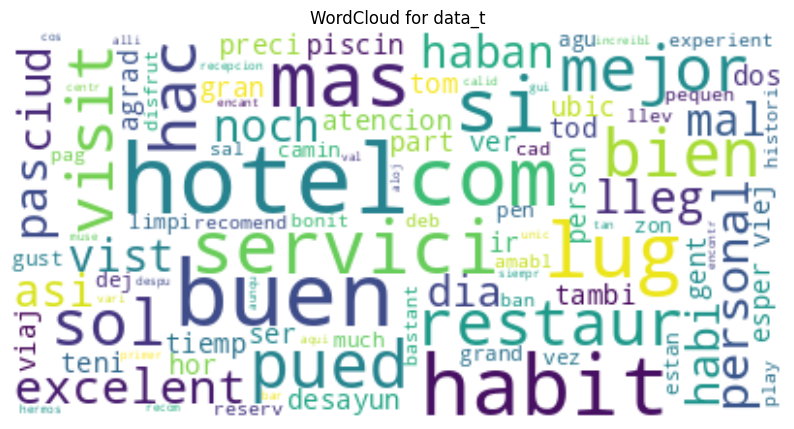

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_counts = {}
for i, row in data_t.iterrows():
    for word in row['words'].split():
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1

wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for data_t")
plt.show()


A partir de lo visto anteriormente, y de un arudo proceso de prueba y error, se realiza la creación de una lista de palabras a eliminar las cuales pueden generar ruido y obstaculizar el proceso de clasifiación.

In [21]:
words_to_remove = ["atencion","hotel","si","habit","com","mas","lug","pued","haban","pas","noch","hac","viej","visit","ciud","dia","dej","ir","alli","aqui","estan","asi","abiert","abierton","lleg","abedul","cruz","dos","servici","sol","personal","person","vist","recepcion","muse","gui","primer","reserv","desayun","ban","despu","restaur","piscin","tod","experient","gui","mes"]
data_t['words'] = data_t['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))

data_t


Review  Class  \
0     Muy buena atención y aclaración de dudas por p...      5   
1     Buen hotel si están obligados a estar cerca de...      3   
2     Es un lugar muy lindo para fotografías, visite...      5   
3     Abusados con la factura de alimentos siempre s...      3   
4     Tuvimos un par de personas en el grupo que rea...      3   
...                                                 ...    ...   
7870  Me parece buen sistema, agiliza el transporte,...      4   
7871  Fue una escapada de un día desde el complejo, ...      4   
7872  La Plaza de la Revolución es un lugar emblemát...      3   
7873  Es la segunda ocasión que me quedo en los cuar...      1   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

                                                  words  
0     buen aclar dud part senorit veron castill aten...  
1     buen oblig cerc centr convencion necesit mejor...  
2     lind fotografi selin music viv cervez artesana...  
3     abus factur aliment siempr echan culp van busc...  
4     par grup realment queri cabrit rest buen prob ...  
...                                                 ...  
7870  parec buen sistem agiliz transport conect metr...  
7871  escap complej grup turist habi inform vez tip ...  
7872  plaz revolucion emblemat identif part segund m...  
7873  segund ocasion qued cuart are jardin comod men...  
7874  casual mercader grup grand vari famili pareci ...  

[7875 rows x 3 columns]

Evidenciamos la eliminación de las palabras.

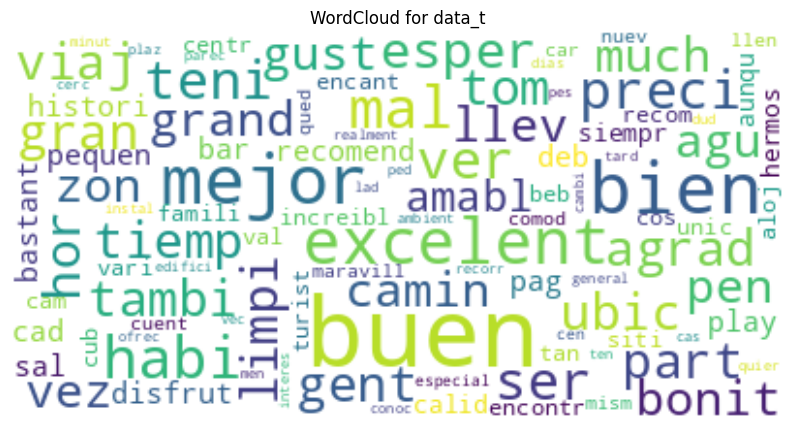

In [22]:
import matplotlib.pyplot as plt
word_counts = {}
for i, row in data_t.iterrows():
    for word in row['words'].split():
        if word not in word_counts:
            word_counts[word] = 0
        word_counts[word] += 1


wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100)
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for data_t")
plt.show()


Ahora, realizaremos el analisis de la frecuencia de palbras por cada califiación.

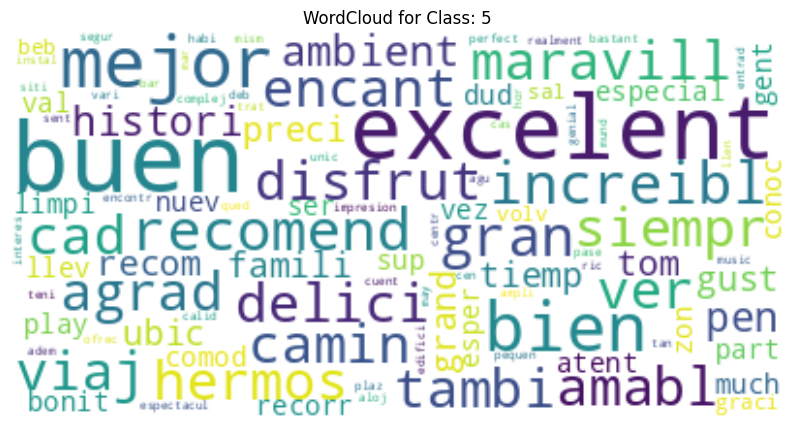

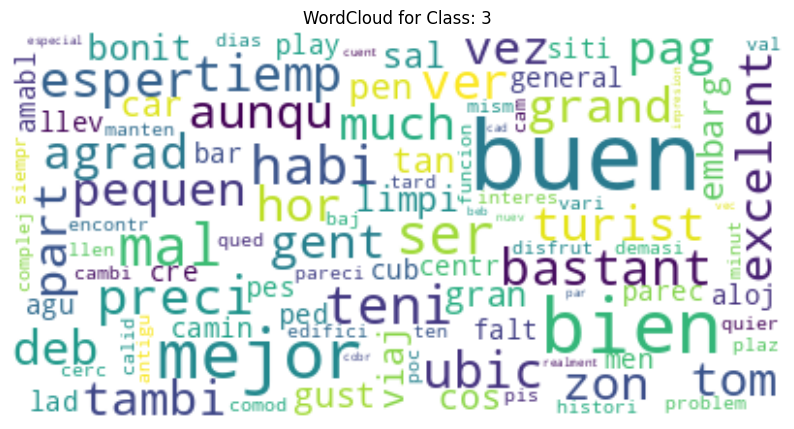

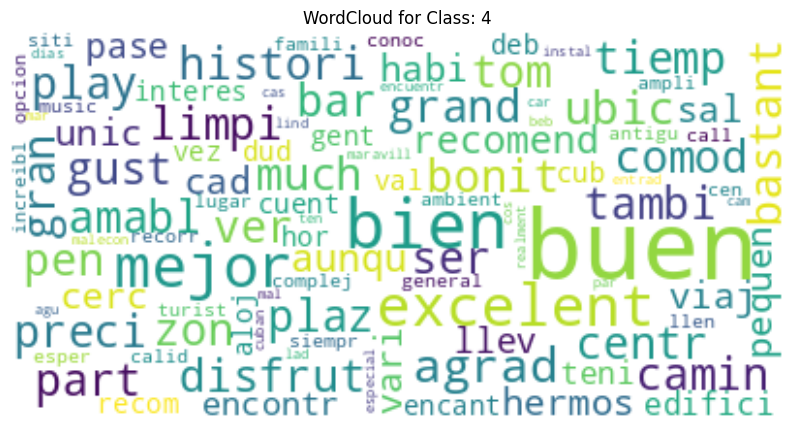

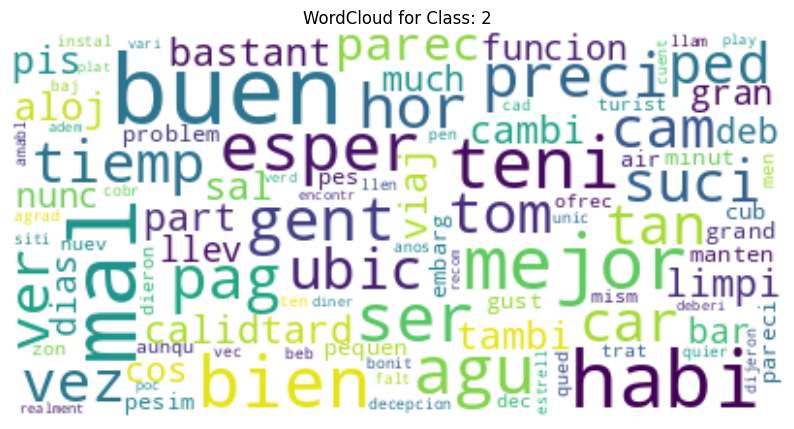

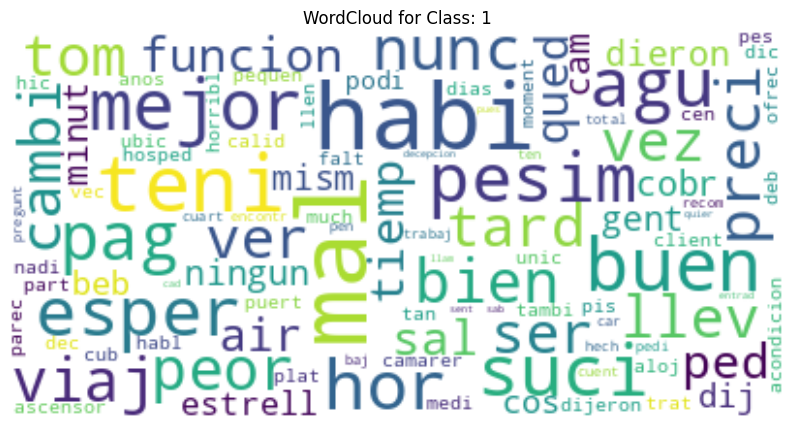

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


word_counts = {}
for i, row in data_t.iterrows():
    if row['Class'] not in word_counts:
        word_counts[row['Class']] = {}
    for word in row['words'].split():
        if word not in word_counts[row['Class']]:
            word_counts[row['Class']][word] = 0
        word_counts[row['Class']][word] += 1


for class_name, word_count in word_counts.items():
    wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100)
    wordcloud.generate_from_frequencies(word_count)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Class: {class_name}")
    plt.show()

Esta vez, por cada clase podemos observar que hay palabras que dificultan la diferenciación. Por ejemplo, en la clase 1 encontramos la palabra "buen" la cual puede denotar algo positivo y serviría para caracterizar mucho más grupos como el 4 o el 5. Por esta razon se realiza un proceso de eliminación de palabras por clase.

Por otra parte, para logar una mejor diferenciación de clases, se decidio eliminar las palabras que tuviesen mayor peso en una categoria pero que igual estuvieran presentes en otra. Por ejemplo, la palabra "excelnte" denota una review que deberia pertenecer a la clase "5", por tanto se quita de clase "4" para mejorar la clasificación. Similarmente, la palabra "pesimo" es removida de la clase "2" dado que "pesimo" caracteriza de una mejor forma a la clase "1". Lo mismo sucede con "mal", que es eliminada de la clase "1" y sirve para diferenciar de una mejor forma a la clase 2.

In [24]:
def remove_words_by_class(data_t, class_name, words_to_remove):
    class_data = data_t[data_t['Class'] == class_name]
    class_data['words'] = class_data['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
    data_t.update(class_data)

    return data_t

palabras_1 = ["mejor","bien","buen","excelent","gran","increibl","hermos","disfrut","delici","limpi","mal"]
palabras_2 = ["mejor","bien","buen","excelent","gran","increibl","hermos","disfrut","delici","limpi","pesim"]
palabras_3 = ["buen","mejor","excelent","pesim","mal","bien"]
palabras_4 = ["mal","peor","pesim","hor","suci","nunc","excelent","hermos"]
palabras_5 = ["mal","peor","pesim","hor","suci","nunc","buen"]

data_t = remove_words_by_class(data_t, 1, palabras_1)
data_t = remove_words_by_class(data_t, 2, palabras_2)
data_t = remove_words_by_class(data_t, 3, palabras_3)
data_t = remove_words_by_class(data_t, 4, palabras_4)
data_t = remove_words_by_class(data_t, 5, palabras_5)


data_t


<ipython-input-24-ecbf2dcd9fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['words'] = class_data['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
<ipython-input-24-ecbf2dcd9fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data['words'] = class_data['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
<ipython-input-24-ecbf2dcd9fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a

Review  Class  \
0     Muy buena atención y aclaración de dudas por p...      5   
1     Buen hotel si están obligados a estar cerca de...      3   
2     Es un lugar muy lindo para fotografías, visite...      5   
3     Abusados con la factura de alimentos siempre s...      3   
4     Tuvimos un par de personas en el grupo que rea...      3   
...                                                 ...    ...   
7870  Me parece buen sistema, agiliza el transporte,...      4   
7871  Fue una escapada de un día desde el complejo, ...      4   
7872  La Plaza de la Revolución es un lugar emblemát...      3   
7873  Es la segunda ocasión que me quedo en los cuar...      1   
7874  Llegamos por casualidad a Los Mercaderes, un g...      5   

                                                  words  
0     aclar dud part senorit veron castill atent ama...  
1     oblig cerc centr convencion necesit fri caf fl...  
2       lind fotografi selin music viv cervez artesanal  
3     abus factur aliment siempr echan culp van busc...  
4     par grup realment queri cabrit rest prob empez...  
...                                                 ...  
7870  parec buen sistem agiliz transport conect metr...  
7871  escap complej grup turist habi inform vez tip ...  
7872  plaz revolucion emblemat identif part segund m...  
7873  segund ocasion qued cuart are jardin comod men...  
7874  casual mercader grup grand vari famili pareci ...  

[7875 rows x 3 columns]

Evidenciamos nuevamente el wordCloud.

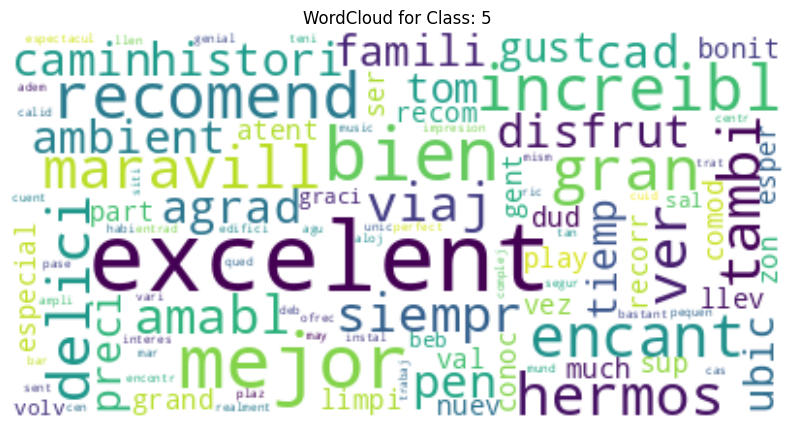

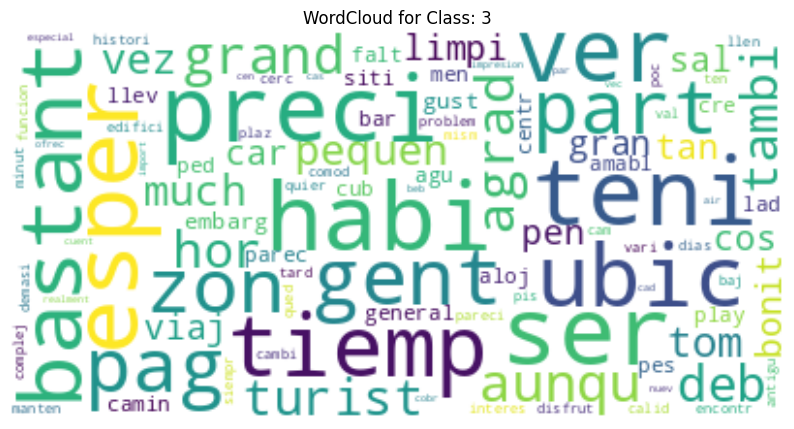

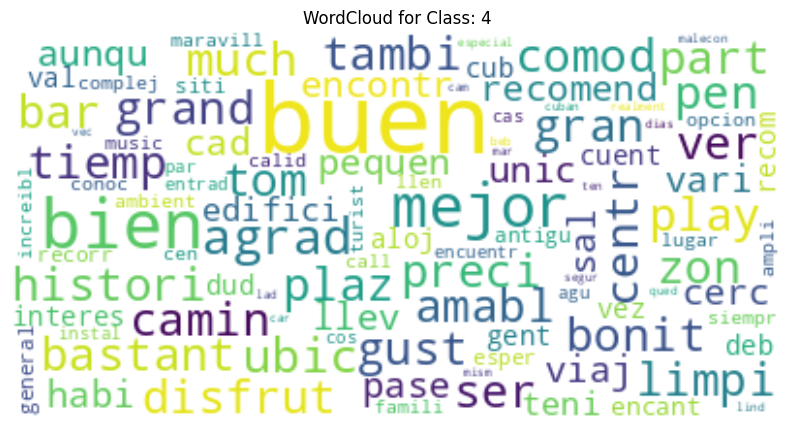

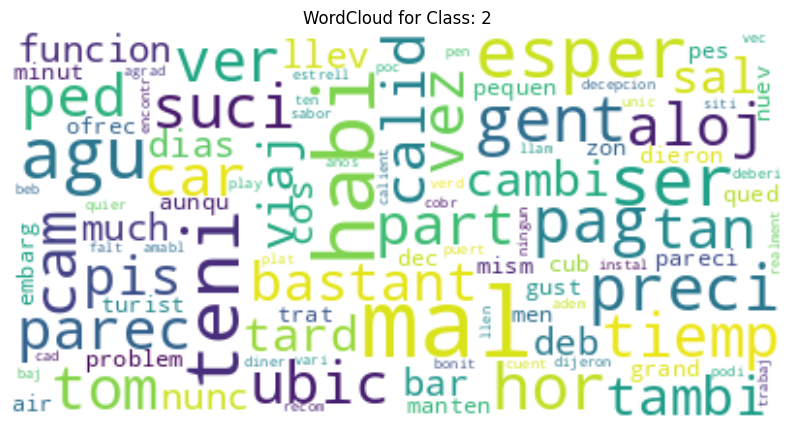

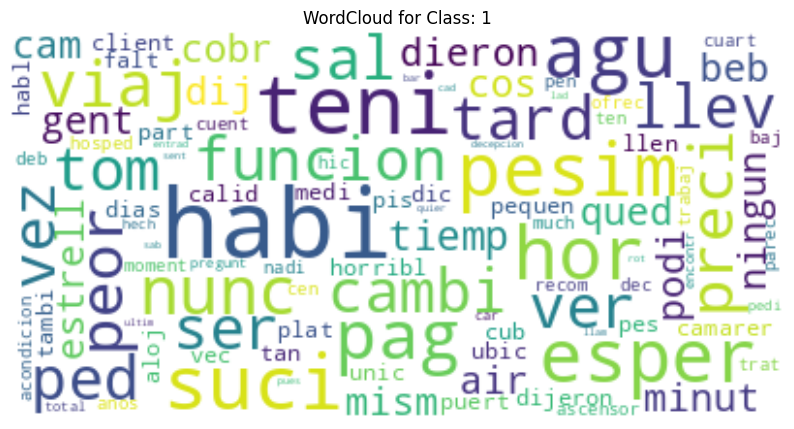

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


word_counts = {}
for i, row in data_t.iterrows():
    if row['Class'] not in word_counts:
        word_counts[row['Class']] = {}
    for word in row['words'].split():
        if word not in word_counts[row['Class']]:
            word_counts[row['Class']][word] = 0
        word_counts[row['Class']][word] += 1

for class_name, word_count in word_counts.items():
    wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100)
    wordcloud.generate_from_frequencies(word_count)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for Class: {class_name}")
    plt.show()

## Modelamiento

### Vectorización y separación de conjuntos

#### Separación de conjuntos

Se procede a definir el conjunto de prueba y entrenamiento.

In [26]:
from sklearn.model_selection import train_test_split

X = data_t['words']
y = data_t['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [27]:
y_train.value_counts()

Class
5    1645
4    1381
3    1112
2     815
1     559
Name: count, dtype: int64

#### Vectorización

Se aplica un proceso de conversión de textos a vectores númericos para posteriormente poder aplicar el algoritmo de clasificación. Para esto se usa tf-idf, el cual permite medir la importancia de la palabra en la colección. Fue el proceso de vectorización que mejores resultados dio.




In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
train_X = tfidf_vectorizer.fit_transform(X_train)
test_X = tfidf_vectorizer.transform(X_test)

### Creación del modelo

Se realiza la creación del modelo usando SVC. Los hiperparametros configurados son kernel, y C. Estos fueron determinados mediante prueba y error. SVC busca encontrar un hiperplano de separación para las clases existentes. La función de kernel nos permite determinar la forma en que se calcula la similitud de los datos, esta puede ser linear, RBF o poly.

In [29]:
from sklearn.svm import SVC


classifier = SVC(kernel='rbf', C=1)
classifier.fit(train_X, y_train)

SVC(C=1)

## Evaluación del modelo

In [30]:
from sklearn.metrics import precision_score
predicciones_test = classifier.predict(test_X)
predicciones_train = classifier.predict(train_X)

### Matriz de confusión

Se procede a observa lar matriz de confusión

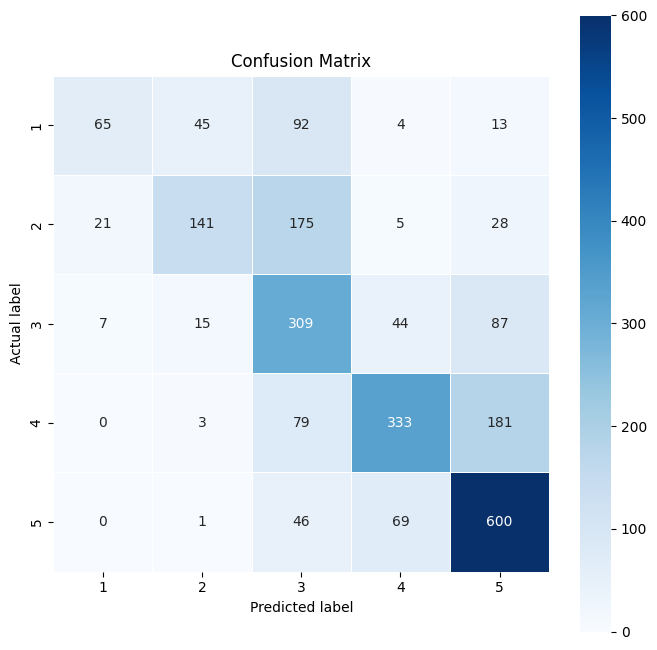

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, predicciones_test)

plt.figure(figsize=(8, 8))
sns.heatmap(data=cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix")
plt.show()


Podemos ver que hay una mayor confusión entre las clases 4 y 5, una gran cantidad de etiquetas fueron clasificadas como 5 cuando realmente eran 4. Esto se puede deber al gran uso de palabras positivas, como buen, bien, excelente, en ambas clases. Algo similar sucede entre la clase 3 y 2.

### Desemepeño

Para el conjunto de pruebas.

In [32]:
from sklearn.metrics import classification_report
informe = classification_report(y_test, predicciones_test)
print(informe)

              precision    recall  f1-score   support

           1       0.70      0.30      0.42       219
           2       0.69      0.38      0.49       370
           3       0.44      0.67      0.53       462
           4       0.73      0.56      0.63       596
           5       0.66      0.84      0.74       716

    accuracy                           0.61      2363
   macro avg       0.64      0.55      0.56      2363
weighted avg       0.64      0.61      0.60      2363



En general observamos una preisición y un recall aceptables. Si realizamos un analisis por clase, la que tiene la peor presición es la clase 3 esto puede deberse a que al ser la clase intermedia, la cual contiene reseñas positivas y negaitvas es mucho más dificil de clasificar. En lo que respecta a la clase 1, esta posee el peor recall lo cual puede demostar dificultades a la hora de clasificar, el modelo esta dejando pasar varios elementos que en realidad pertenecen a la clase 1. Esto puede deberse a que esta es la clase que menos cantidad de datos contiene. Con la clase dos sucede algo similar. Las clases mejor clasificadas fueron la 4 y la 5, tal vez porque eran las categorias que mayor datos tienen.

Para el conjunto de entrenamiento.

In [33]:
print(classification_report(y_train, predicciones_train))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       559
           2       1.00      0.98      0.99       815
           3       0.98      0.99      0.99      1112
           4       0.99      0.99      0.99      1381
           5       0.99      1.00      0.99      1645

    accuracy                           0.99      5512
   macro avg       0.99      0.99      0.99      5512
weighted avg       0.99      0.99      0.99      5512



En el reporte de metricas para el conjunto de entrenamiento observamos que para la clase 1 y 2 su precision es de 1. Esto indica sobreajuste. Tal vez sucedio por la falta de ruido, y la eliminación de algunas palabras. En adición a ello, es importante mencionar que en un inicio se realizaba un balance de las clases, pero curiosamente esto afectaba las metricas de manera negativa, y aumentaba el sobreajuste, por tanto se decidio no aplicar balanceo.

## Conclusión

Finalmente, dadas las metricas de precisión y recall obtenidas, si bien el modelo posee problemas de sobreajuste y metricas no exageradamente cercanas a uno, es una gran aproximación. Como se observo, para el conjunto de prueba el modelo obtuvo metricas aceptables, en su mayoría clasifico adecuadamente las reseñas. Claramente, el modelo podría mejorar, tal vez habria que volver a revisar la parte en donde se hace el analisis de frecuencia por clases y no quitar tanto ruido para evitar el sobreajuste.

Ahora bien, este modelo puede ser de gran valor para **Turismo de los Alpes**, dado que es una gran herramienta para clasificar las reviews dadas por los turistas. Además, en el analisis de frecuencia realizado para cada clase se pueden encontrar cosas interesantes.

 En primer lugar, se pudieron diferenciar palabras por clase, donde para la clase "1" una de las palabras que mas abunda es "pesimo", "tiempo", "precio", "espera" y "funciona", entre otras. Esto puede ser util para determinar que los peores sitios turisticos son clasificados asi tal vez porque tienen malos tiempos de esepera, algunas de las cosas estan descuidadas y no funcionan, y en adición a ello, pueden tener un precio excesivo para el serivicio que otorgan.

En contraste a ello, para observamos que la clase "5" esta determinada por palabras como "excelente", "delicioso", "maravilla", "amable", "mejor" y "recomendado". A partir de esto se puede inferir que las mejores calificaciones son obtenidas para los  sitios en donde el personal es amable, en donde hay buenos restaurantes y su comida es deliciosa. Además, se evidencia que si el cliente se encuentra satisfecho, recomendara el lugar con su familia y amigos.

Asi pues, se le podría sugerir a **Turismo de los Alpes** que para mejorar la experiencia y las reviews de los sitios, podria aplicar estrategias en reducir los tiempos de espera y tener mas control sobre estado de los sitios turisticos, enfocandose tambien en la atención al cliente. Dado que si este se encuentra satisfecho, recomandara el sitio con otras personas, lo cual es una muy buena publicidad que se puede traducir en ganancias.